In [0]:
!pip install geopandas


In [0]:
# Libraries
import os
from os import listdir
from os.path import isfile, join
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import geopandas as gpd



In [0]:
#TODO: Get full dataframe
df = pd.read_csv('./data/CSVFiles/useCaseUnhealthyDataFrame.csv')
df.head()

,coordinates,created_at,geo,id,id_str,lang,place,user,extended_tweet,extended_entities,user_location,Country,City,Longitude,Latitude,Coordinates,text2Proc,username,name,keywords,fastfood,sentiment,emotion,prediction,Length,detections
0,NaN,2019-11-07 15:52:03.000,NaN,1.192470e+18,1.192470e+18,es,"{'id': '0df6ac4d361d4e0e', 'url': 'https://api...","{'id': 729774820402057216, 'id_str': '72977482...",NaN,NaN,Vigo España,Spain,Vigo,-8.916355,42.129380,"(-8.916355, 42.12938)",#Consumo ¿Qué ventajas te aporta consumir acei...,copevigo,COPE Vigo,['cerveza'],1,Neutral,anger,NaN,NaN,NaN
1,NaN,2019-11-07 16:04:25.000,NaN,1.192473e+18,1.192473e+18,es,"{'id': 'a87ad701b9cd8f8a', 'url': 'https://api...","{'id': 550600545, 'id_str': '550600545', 'name...",NaN,NaN,•DE LA EME A LA ZETA•,Spain,León,-5.631302,42.547162,"(-5.631302, 42.547162)",La cerveza.,AndreaDelhi,⚡ A N D R E A ⚡,['cerveza'],1,Neutral,anger,NaN,NaN,NaN
2,NaN,2019-11-07 16:05:44.000,NaN,1.192473e+18,1.192473e+18,es,"{'id': '3642f63f4405f694', 'url': 'https://api...","{'id': 1071395267923058688, 'id_str': '1071395...",{'full_text': '@FriquiPsicologo @Resistenciade...,NaN,NaN,Spain,Callosa de Segura,-0.949171,38.104189,"(-0.949171, 38.104189)",@FriquiPsicologo @Resistenciadelv @PSOE SOCILI...,JosefaFloresPa1,m.jose FP,['pastel'],1,Neutral,awe,NaN,NaN,NaN
3,NaN,2019-11-07 16:05:50.000,NaN,1.192473e+18,1.192473e+18,es,"{'id': 'eb87c69bcba0fdb1', 'url': 'https://api...","{'id': 477399477, 'id_str': '477399477', 'name...",{'full_text': '@italianoadsl na na na.. soy fa...,NaN,La Rioja España / ADSL-LP/ARG,Spain,Haro,-2.912466,42.537990,"(-2.912466, 42.53799)",@italianoadsl na na na.. soy fan!!!\nSiempre c...,tatianavera10,tatiana vera,[],0,Positive,awe,NaN,NaN,NaN
4,NaN,2019-11-07 16:08:43.000,NaN,1.192474e+18,1.192474e+18,es,"{'id': '206c436ce43a43a3', 'url': 'https://api...","{'id': 63444966, 'id_str': '63444966', 'name':...",NaN,NaN,North Carolina USA,Spain,Madrid,-3.889005,40.312071,"(-3.889005, 40.312071)",Ayer me bebí dos jarras de cerveza y hoy tengo...,chamorrismo,Marta,['cerveza'],1,Neutral,annoyance,NaN,NaN,NaN


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8431 entries, 0 to 8430
Data columns (total 26 columns):
coordinates          1231 non-null object
created_at           8431 non-null object
geo                  1231 non-null object
id                   8431 non-null float64
id_str               8431 non-null float64
lang                 8431 non-null object
place                8431 non-null object
user                 8431 non-null object
extended_tweet       3153 non-null object
extended_entities    510 non-null object
user_location        7414 non-null object
Country              8431 non-null object
City                 8431 non-null object
Longitude            8431 non-null float64
Latitude             8431 non-null float64
Coordinates          8431 non-null object
text2Proc            8431 non-null object
username             8431 non-null object
name                 8431 non-null object
keywords             8431 non-null object
fastfood             8431 non-null int64
sentiment

In [0]:
# Cargar la capa temática
natalidad = "natalidad.geojson"
map_data = gpd.read_file(drive_path+natalidad)
map_data.head()

,NAME_1,NAME_2,CC_2,NAT2018,geometry
0,Andalucía,Almería,04,10.48,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35..."
1,Andalucía,Cádiz,11,8.11,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36..."
2,Andalucía,Córdoba,14,7.90,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37..."
3,Andalucía,Granada,18,7.78,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36..."
4,Andalucía,Huelva,21,7.57,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37..."


In [0]:
df.Coordinates[0]

'(-8.916355, 42.12938)'

In [0]:
from shapely.geometry import Point

point_coordinates = []

for index, row in df.iterrows():
    a = (float(i) for i in row['Coordinates'].replace('(', '').replace(')', '').replace(' ','').split(','))
    point = Point(a)
    point_coordinates.append(point)


In [0]:
tweetsInProvince = []
n = 0
for province in map_data['geometry']:
    for point in point_coordinates:
        if province.contains(point):
            n = n + 1
    tweetsInProvince.append(n)
    n = 0

In [0]:
map_data['Tweets'] = tweetsInProvince
map_data

,NAME_1,NAME_2,CC_2,NAT2018,geometry,Tweets
0,Andalucía,Almería,04,10.48,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35...",51
1,Andalucía,Cádiz,11,8.11,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36...",213
2,Andalucía,Córdoba,14,7.90,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37...",39
3,Andalucía,Granada,18,7.78,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36...",206
4,Andalucía,Huelva,21,7.57,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37...",22
5,Andalucía,Jaén,23,7.68,"MULTIPOLYGON (((-3.00812 37.60799, -3.02137 37...",64
6,Andalucía,Málaga,29,8.14,"MULTIPOLYGON (((-4.00083 36.73986, -4.00153 36...",486
7,Andalucía,Sevilla,41,8.71,"MULTIPOLYGON (((-5.94118 36.85199, -5.95270 36...",741
8,Aragón,Huesca,22,7.51,"MULTIPOLYGON (((0.34747 41.42733, 0.34187 41.4...",65
9,Aragón,Teruel,44,7.10,"MULTIPOLYGON (((0.02648 40.69497, 0.02688 40.7...",3


In [0]:
pop = pd.read_excel(drive_path+'Population.xlsx')
map_data['Population'] = pop.Population
map_data = map_data.drop(columns=['CC_2', 'NAT2018'])
map_data

,NAME_1,NAME_2,geometry,Tweets,Population
0,Andalucía,Almería,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35...",51,709340
1,Andalucía,Cádiz,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36...",213,1238714
2,Andalucía,Córdoba,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37...",39,785240
3,Andalucía,Granada,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36...",206,912075
4,Andalucía,Huelva,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37...",22,519932
5,Andalucía,Jaén,"MULTIPOLYGON (((-3.00812 37.60799, -3.02137 37...",64,638099
6,Andalucía,Málaga,"MULTIPOLYGON (((-4.00083 36.73986, -4.00153 36...",486,1641121
7,Andalucía,Sevilla,"MULTIPOLYGON (((-5.94118 36.85199, -5.95270 36...",741,1939887
8,Aragón,Huesca,"MULTIPOLYGON (((0.34747 41.42733, 0.34187 41.4...",65,219345
9,Aragón,Teruel,"MULTIPOLYGON (((0.02648 40.69497, 0.02688 40.7...",3,134572


In [0]:
tweetDensity = map_data.Tweets/map_data.Population
map_data['TweetDensity'] = tweetDensity
map_data

,NAME_1,NAME_2,geometry,Tweets,Population,TweetDensity
0,Andalucía,Almería,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35...",51,709340,0.000072
1,Andalucía,Cádiz,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36...",213,1238714,0.000172
2,Andalucía,Córdoba,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37...",39,785240,0.000050
3,Andalucía,Granada,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36...",206,912075,0.000226
4,Andalucía,Huelva,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37...",22,519932,0.000042
5,Andalucía,Jaén,"MULTIPOLYGON (((-3.00812 37.60799, -3.02137 37...",64,638099,0.000100
6,Andalucía,Málaga,"MULTIPOLYGON (((-4.00083 36.73986, -4.00153 36...",486,1641121,0.000296
7,Andalucía,Sevilla,"MULTIPOLYGON (((-5.94118 36.85199, -5.95270 36...",741,1939887,0.000382
8,Aragón,Huesca,"MULTIPOLYGON (((0.34747 41.42733, 0.34187 41.4...",65,219345,0.000296
9,Aragón,Teruel,"MULTIPOLYGON (((0.02648 40.69497, 0.02688 40.7...",3,134572,0.000022


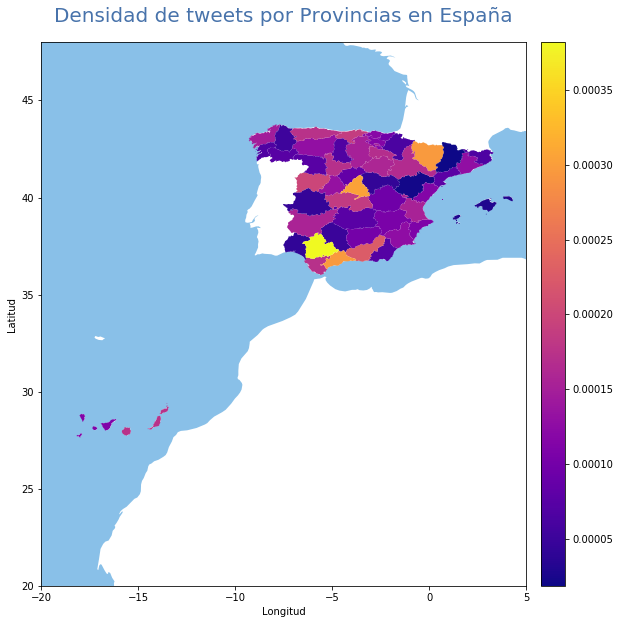

In [0]:
## Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-20, 5, 20, 48])
 
# Control del título y los ejes
ax.set_title('Densidad de tweets por Provincias en España', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
map_data.plot(column='TweetDensity', cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=5)
 
# Cargar un mapa base con contornos de países
oceanos = "ne_50m_ocean.shx"
map_oceanos = gpd.read_file(drive_path + oceanos)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

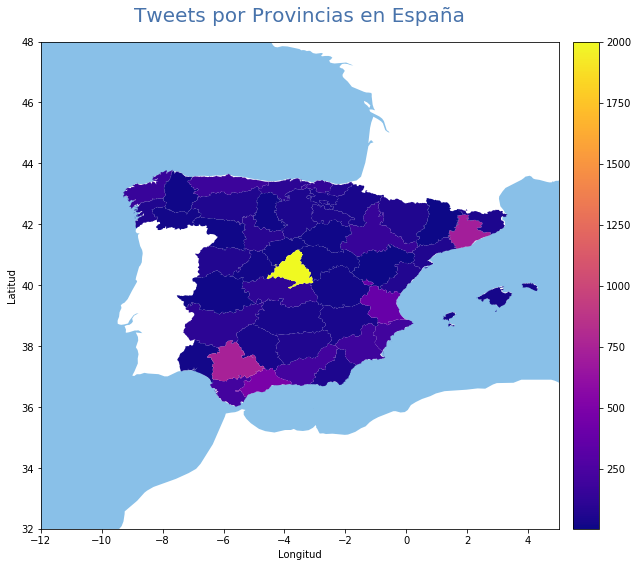

In [0]:
## Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-12, 5, 32, 48])
 
# Control del título y los ejes
ax.set_title('Tweets por Provincias en España', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
map_data.plot(column='Tweets', cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=5)
 
# Cargar un mapa base con contornos de países
oceanos = "ne_50m_ocean.shx"
map_oceanos = gpd.read_file(drive_path + oceanos)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

In [0]:
df_original = df

### Fastfood analysis

In [0]:
df.fastfood.value_counts()

1    5604
0    2827
Name: fastfood, dtype: int64

In [0]:
df = df[df['fastfood'] == 1]

In [0]:

point_coordinates = []

for index, row in df.iterrows():
    a = (float(i) for i in row['Coordinates'].replace('(', '').replace(')', '').replace(' ','').split(','))
    point = Point(a)
    point_coordinates.append(point)

In [0]:
tweetsInProvince = []
n = 0
for province in map_data['geometry']:
    for point in point_coordinates:
        if province.contains(point):
            n = n + 1
    tweetsInProvince.append(n)
    n = 0

map_data['Fastfood_Tweets'] = tweetsInProvince
map_data

,NAME_1,NAME_2,geometry,Tweets,Population,TweetDensity,Fastfood_Tweets
0,Andalucía,Almería,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35...",51,709340,0.000072,39
1,Andalucía,Cádiz,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36...",213,1238714,0.000172,167
2,Andalucía,Córdoba,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37...",39,785240,0.000050,29
3,Andalucía,Granada,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36...",206,912075,0.000226,127
4,Andalucía,Huelva,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37...",22,519932,0.000042,14
5,Andalucía,Jaén,"MULTIPOLYGON (((-3.00812 37.60799, -3.02137 37...",64,638099,0.000100,45
6,Andalucía,Málaga,"MULTIPOLYGON (((-4.00083 36.73986, -4.00153 36...",486,1641121,0.000296,339
7,Andalucía,Sevilla,"MULTIPOLYGON (((-5.94118 36.85199, -5.95270 36...",741,1939887,0.000382,421
8,Aragón,Huesca,"MULTIPOLYGON (((0.34747 41.42733, 0.34187 41.4...",65,219345,0.000296,24
9,Aragón,Teruel,"MULTIPOLYGON (((0.02648 40.69497, 0.02688 40.7...",3,134572,0.000022,2


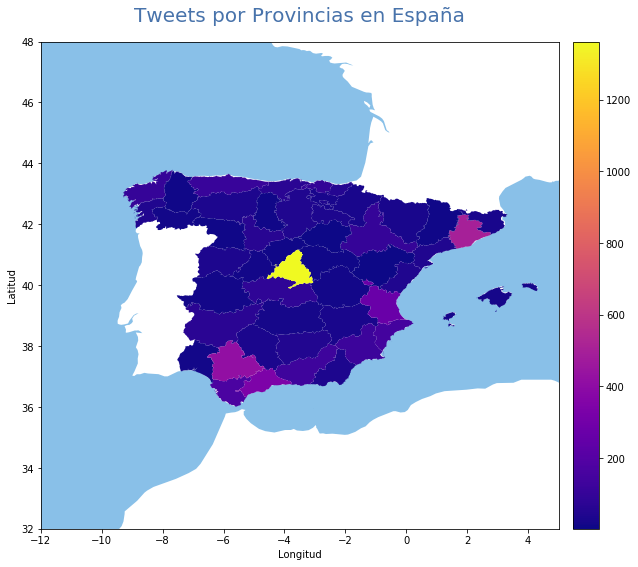

In [0]:
## Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-12, 5, 32, 48])
 
# Control del título y los ejes
ax.set_title('Tweets por Provincias en España', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
map_data.plot(column='Fastfood_Tweets', cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=5)
 
# Cargar un mapa base con contornos de países
oceanos = "ne_50m_ocean.shx"
map_oceanos = gpd.read_file(drive_path + oceanos)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

In [0]:
map_data[['NAME_2', 'Fastfood_Tweets', 'Population']].sort_values(by='Fastfood_Tweets', ascending=False)

,NAME_2,Fastfood_Tweets,Population
30,Madrid,1362,6578079
26,Barcelona,501,5609350
7,Sevilla,421,1939887
6,Málaga,339,1641121
34,Valencia,270,2547986
1,Cádiz,167,1238714
32,Alicante,147,1838819
42,Las Palmas,129,1109175
3,Granada,127,912075
49,Murcia,124,1478509


In [0]:
from scipy.stats import pearsonr

corr, _ = pearsonr(map_data.Fastfood_Tweets.values, map_data.Population.values)
corr

0.9126051922293684

In [0]:
map_data['Densidad_Fastfood'] = map_data.Fastfood_Tweets / map_data.Population
map_data[['NAME_2', 'Fastfood_Tweets', 'Population', 'Densidad_Fastfood']].sort_values(by='Densidad_Fastfood', ascending=False).head(10)

,NAME_2,Fastfood_Tweets,Population,Densidad_Fastfood
7,Sevilla,421,1939887,0.000217
30,Madrid,1362,6578079,0.000207
6,Málaga,339,1641121,0.000207
3,Granada,127,912075,0.000139
1,Cádiz,167,1238714,0.000135
18,Burgos,44,357070,0.000123
11,Cantabria,71,580229,0.000122
16,Toledo,82,687391,0.000119
24,Valladolid,62,519851,0.000119
21,Salamanca,39,331473,0.000118


In [0]:
corr, _ = pearsonr(map_data.Densidad_Fastfood.values, map_data.Population.values)
corr

0.46152057184430656

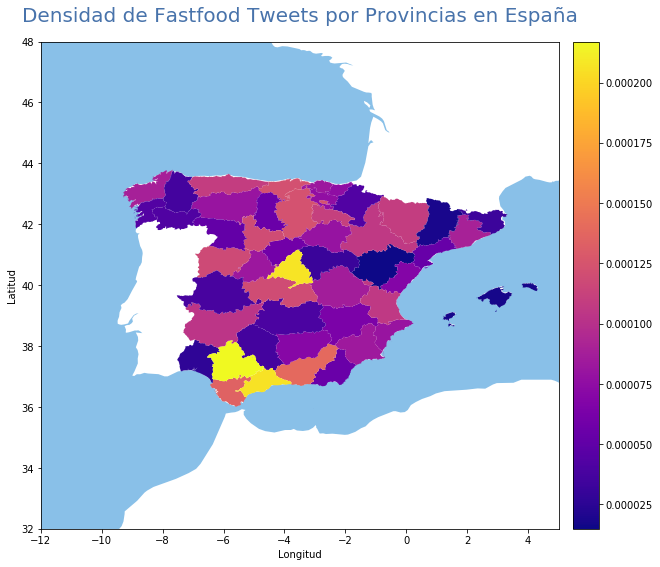

In [0]:
## Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-12, 5, 32, 48])
 
# Control del título y los ejes
ax.set_title('Densidad de Fastfood Tweets por Provincias en España', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
map_data.plot(column='Densidad_Fastfood', cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=5)
 
# Cargar un mapa base con contornos de países
oceanos = "ne_50m_ocean.shx"
map_oceanos = gpd.read_file(drive_path + oceanos)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

### System validation

In [0]:
comunidades_map = gpd.read_file(drive_path + 'comunidades-autonomas-espanolas.json')
comunidades_map

,codigo,comunidade_autonoma,texto,geometry
0,01,Andalucía,Andalucía,"MULTIPOLYGON (((-5.43733 36.06423, -5.43740 36..."
1,07,Castilla y León,Castilla y León,"MULTIPOLYGON (((-2.93489 42.59441, -2.93960 42..."
2,10,Comunitat Valenciana,Comunidad Valenciana,"MULTIPOLYGON (((-0.48546 38.16507, -0.48545 38..."
3,16,Euskadi,País Vasco,"MULTIPOLYGON (((-1.99803 43.32285, -1.99707 43..."
4,12,Galicia,Galicia,"MULTIPOLYGON (((-8.93646 42.34939, -8.93396 42..."
5,17,La Rioja,La Rioja,"POLYGON ((-2.99723 42.64214, -2.98995 42.64233..."
6,04,Illes Balears,Islas Baleares,"MULTIPOLYGON (((4.09396 40.08836, 4.09450 40.0..."
7,19,Melilla,Melilla,"POLYGON ((-2.95254 35.32000, -2.94915 35.31598..."
8,03,Asturias,Principado de Asturias,"POLYGON ((-5.83988 43.66123, -5.84226 43.65719..."
9,06,Cantabria,Cantabria,"MULTIPOLYGON (((-3.26382 43.26583, -3.24920 43..."


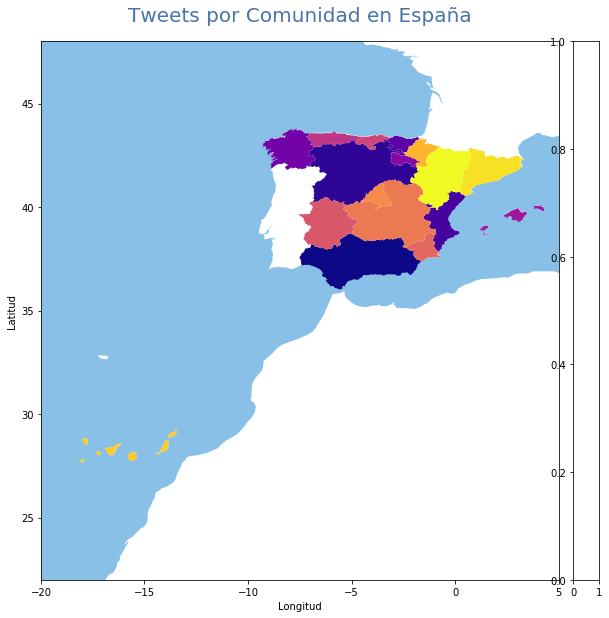

In [0]:
## Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-20, 5, 22, 48])
 
# Control del título y los ejes
ax.set_title('Tweets por Comunidad en España', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
comunidades_map.plot( cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=5)
 
# Cargar un mapa base con contornos de países
oceanos = "ne_50m_ocean.shx"
map_oceanos = gpd.read_file(drive_path + oceanos)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

### Diabetes Correlation

In [0]:
diabetes_rel = pd.read_excel(drive_path + '01004.xlsx', header=6, skipfooter=11, usecols=5)
diabetes_rel = diabetes_rel.drop(0)
diabetes_rel

/usr/local/lib/python3.6/dist-packages/pandas/io/excel/_base.py:445: FutureWarning: Passing in an integer for `usecols` has been deprecated. Please pass in a list of int from 0 to `usecols` inclusive instead.
  usecols = _maybe_convert_usecols(usecols)


,,Total,"Peso insuficiente (IMC <18,5 kg/m2)","Normopeso (18,5 kg/m2 <= IMC < 25 kg/m2)",Sobrepeso (25 kg/m2 <= IMC < 30 kg/m2),Obesidad (IMC >= 30 kg/m2)
1,Total,100.0,2.17,43.34,37.07,17.43
2,Andalucía,100.0,2.30,39.16,37.53,21.00
3,Aragón,100.0,2.41,45.07,36.80,15.73
4,Principado de Asturias,100.0,2.07,38.81,37.44,21.68
5,Islas Baleares,100.0,3.04,50.39,31.08,15.49
6,Islas Canarias,100.0,1.92,41.63,37.20,19.26
7,Cantabria,100.0,2.99,43.27,36.24,17.50
8,Castilla y León,100.0,2.44,45.17,39.16,13.22
9,Castilla-La Mancha,100.0,1.17,43.77,34.74,20.32
10,Cataluña,100.0,1.87,46.52,36.66,14.94


In [0]:
diabetes_abs = pd.read_excel(drive_path + '01004 (1).xlsx', header=6, skipfooter=11, usecols=6)
diabetes_abs = diabetes_abs.drop([0,1,19,20])
diabetes_abs = diabetes_abs.rename(columns={' ': 'Lugar'})
diabetes_abs = diabetes_abs.rename(columns={'Sobrepeso (25 kg/m2 <= IMC < 30 kg/m2)': 'Sobrepeso'})
diabetes_abs = diabetes_abs.rename(columns={'Obesidad (IMC >= 30 kg/m2)': 'Obesidad'})
diabetes_abs = diabetes_abs.drop(columns='Peso insuficiente (IMC <18,5 kg/m2)')
diabetes_abs = diabetes_abs.drop(columns='Normopeso (18,5 kg/m2 <= IMC < 25 kg/m2)')
diabetes_abs = diabetes_abs.drop(columns='No consta')

diabetes_abs.head()

/usr/local/lib/python3.6/dist-packages/pandas/io/excel/_base.py:445: FutureWarning: Passing in an integer for `usecols` has been deprecated. Please pass in a list of int from 0 to `usecols` inclusive instead.
  usecols = _maybe_convert_usecols(usecols)


,Lugar,Total,Sobrepeso,Obesidad
2,Andalucía,6637.5,2412.1,1349.9
3,Aragón,1056.6,377.5,161.4
4,Principado de Asturias,890.5,320.1,185.4
5,Islas Baleares,925.3,270.0,134.6
6,Islas Canarias,1767.2,609.7,315.7


In [0]:
map_data_comunidades = map_data[['Fastfood_Tweets', 'Population', 'NAME_1' ]].groupby(['NAME_1']).sum()
map_data_comunidades['densidad'] = map_data_comunidades.Fastfood_Tweets / map_data_comunidades.Population
from sklearn import preprocessing
x = map_data_comunidades.densidad.values.reshape(-1,1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
map_data_comunidades['escalado'] = x_scaled
map_data_comunidades

,Fastfood_Tweets,Population,densidad,escalado
NAME_1,,,,
Andalucía,1181,8384408,0.000141,0.650384
Aragón,127,1308728,0.000097,0.418964
Cantabria,71,580229,0.000122,0.552720
Castilla y León,229,2409164,0.000095,0.408469
Castilla-La Mancha,152,2026807,0.000075,0.302525
Cataluña,577,7600065,0.000076,0.307414
Comunidad Foral de Navarra,28,647554,0.000043,0.134805
Comunidad Valenciana,457,4963703,0.000092,0.392701
Comunidad de Madrid,1362,6578079,0.000207,1.000000


In [0]:
diabetes_abs['total_obesidad'] = diabetes_abs.Sobrepeso + diabetes_abs.Obesidad
diabetes_abs['densidad'] = diabetes_abs['total_obesidad'] / diabetes_abs.Total 
x = diabetes_abs['total_obesidad'].values.reshape(-1,1) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
diabetes_abs['escalado'] = x_scaled
diabetes_abs

,Lugar,Total,Sobrepeso,Obesidad,total_obesidad,densidad,escalado
2,Andalucía,6637.5,2412.1,1349.9,3762.0,0.566780,1.000000
3,Aragón,1056.6,377.5,161.4,538.9,0.510032,0.112998
4,Principado de Asturias,890.5,320.1,185.4,505.5,0.567659,0.103806
5,Islas Baleares,925.3,270.0,134.6,404.6,0.437264,0.076038
6,Islas Canarias,1767.2,609.7,315.7,925.4,0.523653,0.219363
7,Cantabria,475.8,136.9,66.1,203.0,0.426650,0.020558
8,Castilla y León,2024.4,760.1,256.6,1016.7,0.502223,0.244489
9,Castilla-La Mancha,1612.7,517.4,302.6,820.0,0.508464,0.190357
10,Cataluña,5953.4,2106.0,858.5,2964.5,0.497951,0.780527
11,Comunidad Valenciana,3953.4,1424.8,738.6,2163.4,0.547225,0.560063


In [0]:
def stripLugar(x):
  return x.strip()

In [0]:
diabetes_abs.Lugar = diabetes_abs.Lugar.apply(stripLugar)

In [0]:
diabetes_abs = diabetes_abs.sort_values('Lugar')
diabetes_abs

,Lugar,Total,Sobrepeso,Obesidad,total_obesidad,densidad,escalado
2,Andalucía,6637.5,2412.1,1349.9,3762.0,0.566780,1.000000
3,Aragón,1056.6,377.5,161.4,538.9,0.510032,0.112998
7,Cantabria,475.8,136.9,66.1,203.0,0.426650,0.020558
8,Castilla y León,2024.4,760.1,256.6,1016.7,0.502223,0.244489
9,Castilla-La Mancha,1612.7,517.4,302.6,820.0,0.508464,0.190357
10,Cataluña,5953.4,2106.0,858.5,2964.5,0.497951,0.780527
16,Comunidad Foral de Navarra,511.2,173.6,75.0,248.6,0.486307,0.033107
11,Comunidad Valenciana,3953.4,1424.8,738.6,2163.4,0.547225,0.560063
14,Comunidad de Madrid,5191.2,1784.8,805.7,2590.5,0.499018,0.677601
12,Extremadura,881.9,323.4,163.6,487.0,0.552217,0.098715


In [0]:
ffood = map_data_comunidades.escalado.values
ob_total = diabetes_abs.escalado.values

fast food: mean=0.39938785 stdv=0.21054952
ob_total: mean=0.28273887 stdv=0.28512084


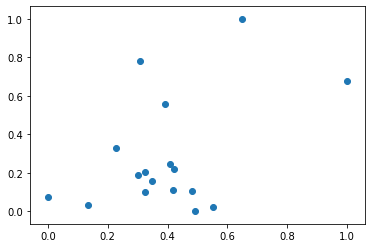

In [0]:
from numpy import mean
from numpy import std
print('fast food: mean=%.8f stdv=%.8f' % (mean(ffood), std(ffood)))
print('ob_total: mean=%.8f stdv=%.8f' % (mean(ob_total), std(ob_total)))
# plot
plt.scatter(ffood, ob_total)
plt.show()

In [0]:
from numpy import cov
# calculate covariance matrix
covariance = cov(ffood, ob_total)
print(covariance)

[[0.04710179 0.02869021]
 [0.02869021 0.08637476]]


In [0]:
# calculate Pearson's correlation
corr, _ = pearsonr(ffood, ob_total)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.450


### Wordcloud

In [0]:
!pip install wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [0]:
df

,coordinates,created_at,geo,id,id_str,lang,place,user,extended_tweet,extended_entities,user_location,Country,City,Longitude,Latitude,Coordinates,text2Proc,username,name,keywords,fastfood,sentiment,emotion,prediction,Length,detections
0,NaN,2019-11-07 15:52:03.000,NaN,1.192470e+18,1.192470e+18,es,"{'id': '0df6ac4d361d4e0e', 'url': 'https://api...","{'id': 729774820402057216, 'id_str': '72977482...",NaN,NaN,Vigo España,Spain,Vigo,-8.916355,42.129380,"(-8.916355, 42.12938)",#Consumo ¿Qué ventajas te aporta consumir acei...,copevigo,COPE Vigo,['cerveza'],1,Neutral,anger,NaN,NaN,NaN
1,NaN,2019-11-07 16:04:25.000,NaN,1.192473e+18,1.192473e+18,es,"{'id': 'a87ad701b9cd8f8a', 'url': 'https://api...","{'id': 550600545, 'id_str': '550600545', 'name...",NaN,NaN,•DE LA EME A LA ZETA•,Spain,León,-5.631302,42.547162,"(-5.631302, 42.547162)",La cerveza.,AndreaDelhi,⚡ A N D R E A ⚡,['cerveza'],1,Neutral,anger,NaN,NaN,NaN
2,NaN,2019-11-07 16:05:44.000,NaN,1.192473e+18,1.192473e+18,es,"{'id': '3642f63f4405f694', 'url': 'https://api...","{'id': 1071395267923058688, 'id_str': '1071395...",{'full_text': '@FriquiPsicologo @Resistenciade...,NaN,NaN,Spain,Callosa de Segura,-0.949171,38.104189,"(-0.949171, 38.104189)",@FriquiPsicologo @Resistenciadelv @PSOE SOCILI...,JosefaFloresPa1,m.jose FP,['pastel'],1,Neutral,awe,NaN,NaN,NaN
4,NaN,2019-11-07 16:08:43.000,NaN,1.192474e+18,1.192474e+18,es,"{'id': '206c436ce43a43a3', 'url': 'https://api...","{'id': 63444966, 'id_str': '63444966', 'name':...",NaN,NaN,North Carolina USA,Spain,Madrid,-3.889005,40.312071,"(-3.889005, 40.312071)",Ayer me bebí dos jarras de cerveza y hoy tengo...,chamorrismo,Marta,['cerveza'],1,Neutral,annoyance,NaN,NaN,NaN
5,NaN,2019-11-07 16:10:47.000,NaN,1.192474e+18,1.192474e+18,es,"{'id': '98fab95e329ae2e4', 'url': 'https://api...","{'id': 141926030, 'id_str': '141926030', 'name...",NaN,NaN,País de la Piruleta.,Spain,Nerja,-3.912388,36.737518,"(-3.912388, 36.737518)",Mi plan de esta tarde es beber me una botella ...,8amDejarmeEnPaz,cero zorreo,['vino'],1,Positive,annoyance,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8426,NaN,2019-12-15 17:20:03.000,NaN,1.206263e+18,1.206263e+18,es,"{'id': 'e5569d105f28336e', 'url': 'https://api...","{'id': 168722840, 'id_str': '168722840', 'name...",NaN,NaN,Valencia España,Spain,Paterna,-0.518483,39.486427,"(-0.518483, 39.486427)",Me provoca una hamburguesa con doble carné y c...,PCCG_,Paulo👽.,"['hamburguesa', 'coca cola']",1,Neutral,annoyance,NaN,NaN,NaN
8427,NaN,2019-12-15 17:39:16.000,NaN,1.206267e+18,1.206267e+18,es,"{'id': 'd9ebaeaac39060be', 'url': 'https://api...","{'id': 833052669845594112, 'id_str': '83305266...",NaN,NaN,Vigo gz | Ourense gz,Spain,Ourense,-8.003734,42.288179,"(-8.003734, 42.288179)",Planeando huir de la biblio para ir a por un k...,LupitaOtero12,Lu,['kebab'],1,Positive,annoyance,NaN,NaN,NaN
8428,NaN,2019-12-15 17:42:00.000,NaN,1.206268e+18,1.206268e+18,es,"{'id': 'db3ae73fb88e93d8', 'url': 'https://api...","{'id': 3851955322, 'id_str': '3851955322', 'na...",NaN,"{'media': [{'id': 1206268145377464320, 'id_str...",NaN,Spain,Marbella,-5.014957,36.459841,"(-5.014957, 36.459841)","Me salió buena la tarta de galletas,si quieren...",TamaraPaquito,Daenerys madre de dragones.,"['tarta', 'galletas', 'anís', 'brandy']",1,Positive,awe,NaN,NaN,NaN
8429,"{'type': 'Point', 'coordinates': [-0.988300000...",2019-12-15 17:52:24.000,"{'type': 'Point', 'coordinates': [37.6033, -0....",1.206271e+18,1.206271e+18,es,"{'id': 'd151b58850d4cd1e', 'url': 'https://api...","{'id': 1694020452, 'id_str': '1694020452', 'na...",NaN,NaN,Cartagena,Spain,Cartagena,-1.225551,37.533889,"(-1.225551, 37.533889)",Tarta de asiático y un café lito..... Que gran...,Tonytorrusco,Tony Suárez,['tarta'],1,Positive,amusement,NaN,NaN,NaN


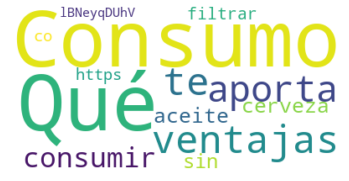

In [0]:
# Start with one review:
text = df.text2Proc[0]

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
!pip install gsitk
from gsitk.preprocess import pprocess_twitter
from nltk.corpus import stopwords


     |████████████████████████████████| 9.5MB 4.3MB/s 
     |████████████████████████████████| 15.9MB 34.5MB/s 
  Created wheel for gsitk: filename=gsitk-0.1.9.2-cp36-none-any.whl size=9568906 sha256=78f52167610da326ddf949b1acc500849ceedb1c0a9683823d51ce13b3feb38f
  Stored in directory: /root/.cache/pip/wheels/96/9d/4d/4eac8e0cbf406c30f025f2e009d17c1e233a36dc348f2bc9ff
  Created wheel for pytreebank: filename=pytreebank-0.2.6-cp36-none-any.whl size=36656 sha256=c62e055157f1365a0a13ee086b5c2777cd5c05022bdfd3cb91d9961f56addb97
  Stored in directory: /root/.cache/pip/wheels/c7/89/cd/b95f8325d4c688b719ee70757a8ed09c2b3ddb6446b56be991
Successfully built gsitk pytreebank
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [0]:
import nltk
nltk.download('stopwords')
stoplist = stopwords.words('spanish')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
stopwords = set(stoplist)
stopwords.update(['hastag', 'allcaps', 'user', 'number', 'repeat', 'url', 'gt'])


In [0]:
text = " ".join(pprocess_twitter.preprocess(tweet) for tweet in df.text2Proc)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 764782 words in the combination of all review.


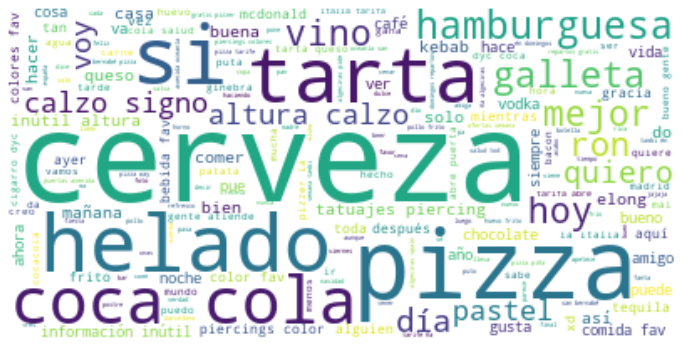

In [0]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Food terms

In [0]:
df.keywords.value_counts().head(30)

['cerveza']                 1072
['pizza']                    794
['helado']                   403
['tarta']                    361
[]                           330
['galletas']                 228
['pastel']                   199
['hamburguesa']              188
['ron']                      187
['vino']                     174
['frito']                    169
['coca cola']                157
['kebab']                    142
['tequila']                  112
['vodka']                     82
['cerveza', 'ron']            49
['mcdonalds']                 48
['cocacola']                  44
['bacon']                     41
['fanta']                     38
['cerveza', 'vino']           34
['cruzcampo']                 31
['pastel', 'tarta']           31
['pizza', 'telepizza']        30
['pizza', 'ron']              28
['ginebra']                   27
['refresco']                  27
['ron', 'vino']               23
['cerveza', 'cruzcampo']      19
['tarta', 'ron']              17
Name: keyw

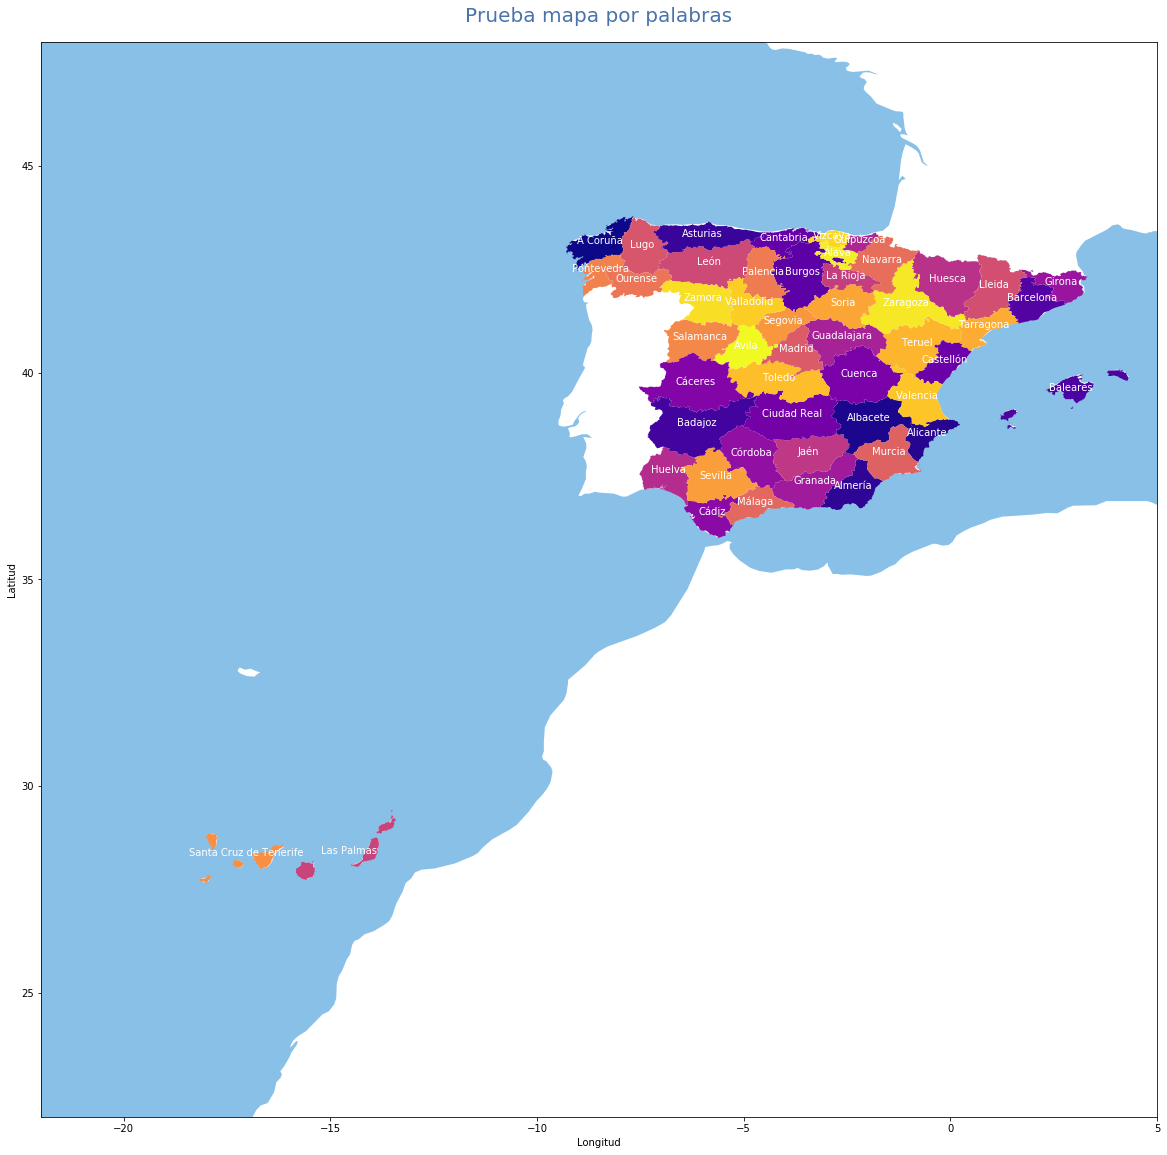

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

    
# Control del encuadre (área geográfica) del mapa
ax.axis([-22, 5, 22, 48])
 
# Control del título y los ejes
ax.set_title('Prueba mapa por palabras', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

map_data.plot(column = 'NAME_2',	ax=ax, cmap='plasma')
for idx, row in map_data.iterrows():
    plt.annotate(s=row['NAME_2'], xy=list(row['geometry'].centroid.coords)[0],
                 horizontalalignment='center', color='white') 
 
# Cargar un mapa base con contornos de países
oceanos = "ne_50m_ocean.shx"
map_oceanos = gpd.read_file(drive_path + oceanos)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

In [0]:
map_data.head()

,NAME_1,NAME_2,geometry,Tweets,Population,TweetDensity,Fastfood_Tweets,Densidad_Fastfood
0,Andalucía,Almería,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35...",51,709340,0.000072,39,0.000055
1,Andalucía,Cádiz,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36...",213,1238714,0.000172,167,0.000135
2,Andalucía,Córdoba,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37...",39,785240,0.000050,29,0.000037
3,Andalucía,Granada,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36...",206,912075,0.000226,127,0.000139
4,Andalucía,Huelva,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37...",22,519932,0.000042,14,0.000027


In [0]:
df.keywords.head()

0    ['cerveza']
1    ['cerveza']
2     ['pastel']
4    ['cerveza']
5       ['vino']
Name: keywords, dtype: object

In [0]:
df['Point_Coords'] = point_coordinates
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5604 entries, 0 to 8430
Data columns (total 27 columns):
coordinates          911 non-null object
created_at           5604 non-null object
geo                  911 non-null object
id                   5604 non-null float64
id_str               5604 non-null float64
lang                 5604 non-null object
place                5604 non-null object
user                 5604 non-null object
extended_tweet       2211 non-null object
extended_entities    368 non-null object
user_location        4955 non-null object
Country              5604 non-null object
City                 5604 non-null object
Longitude            5604 non-null float64
Latitude             5604 non-null float64
Coordinates          5604 non-null object
text2Proc            5604 non-null object
username             5604 non-null object
name                 5604 non-null object
keywords             5604 non-null object
fastfood             5604 non-null int64
sentiment  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
marcas =['cocacola', 'coca cola', 'pepsi', '100 montaditos', 'mcdonalds', 'burguer king', 'tacoBell', 'telepizza',
                'dominos', 'dominos pizza', 'starbucks', 'rodilla', 'pans & company', 'kfc',
                 'fanta', 'estrella galicia', 'cruzcampo', 'mahou', 'estrella damn', 'amstel']
fastfood_keywords = ['bacon', 'pastel', 'tarta', 'galletas', 'bebida energética', 'perrito caliente', 'helado', 
                     'pizza', 'frito', 'cerveza', 'hamburguesa', 'kebab', 'refresco', 'fastfood', 'vodka', 'whiskey',
                    'ron', 'tequila', 'vino', 'ginebra', 'anís', 'brandy','nuggets']

In [0]:
keywords_dict = {}

for marca in marcas:
  keywords_dict[marca]= 0
for food in fastfood_keywords:
  keywords_dict[food] = 0



In [0]:
import ast
ast.literal_eval(df.keywords[0])

['cerveza']

In [0]:
for items in df.keywords:
  items = ast.literal_eval(items)
  for item in items:
    keywords_dict[item] += 1

keywords_list = sorted(keywords_dict.items(), key = 
             lambda kv:(kv[1], kv[0]))
keywords_list

[('dominos pizza', 0),
 ('estrella damn', 0),
 ('pans & company', 0),
 ('tacoBell', 0),
 ('bebida energética', 1),
 ('amstel', 2),
 ('perrito caliente', 3),
 ('rodilla', 3),
 ('100 montaditos', 4),
 ('fastfood', 6),
 ('whiskey', 6),
 ('nuggets', 9),
 ('dominos', 10),
 ('estrella galicia', 13),
 ('brandy', 15),
 ('anís', 17),
 ('kfc', 18),
 ('mahou', 18),
 ('pepsi', 18),
 ('starbucks', 18),
 ('burguer king', 19),
 ('telepizza', 38),
 ('refresco', 45),
 ('ginebra', 50),
 ('cruzcampo', 59),
 ('mcdonalds', 61),
 ('fanta', 62),
 ('cocacola', 66),
 ('bacon', 68),
 ('vodka', 102),
 ('tequila', 130),
 ('kebab', 166),
 ('coca cola', 188),
 ('frito', 195),
 ('hamburguesa', 256),
 ('pastel', 259),
 ('galletas', 265),
 ('vino', 282),
 ('helado', 442),
 ('ron', 448),
 ('tarta', 458),
 ('pizza', 942),
 ('cerveza', 1255)]

In [0]:
keys, values = zip(*keywords_list)

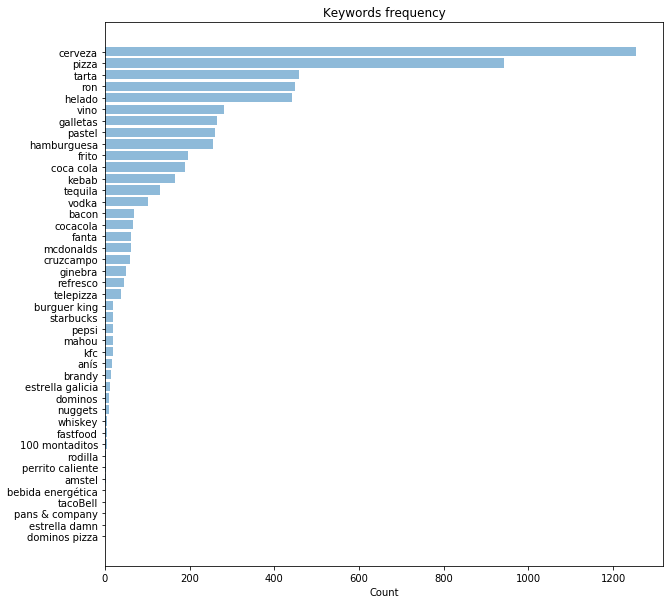

In [0]:
y_pos = np.arange(len(keys))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, keys)
plt.xlabel('Count')
plt.title('Keywords frequency')

plt.show()

In [0]:
keywordsProv = {}

for prov in map_data.NAME_2:
  keywordsProv[prov]= []


for idx, row in df.iterrows():
  for idx_map, row_map in map_data.iterrows():
    if row_map['geometry'].contains(row['Point_Coords']):
      for item in ast.literal_eval(row['keywords']):
        keywordsProv[row_map['NAME_2']].append(item)
    
keywordsProv 

{'A Coruña': ['pizza',
  'helado',
  'pastel',
  'estrella galicia',
  'vino',
  'vino',
  'pastel',
  'vino',
  'vino',
  'hamburguesa',
  'vodka',
  'helado',
  'cerveza',
  'kfc',
  'coca cola',
  'pastel',
  'frito',
  'kebab',
  'helado',
  'coca cola',
  'tarta',
  'cerveza',
  'hamburguesa',
  'cerveza',
  'cerveza',
  'estrella galicia',
  'galletas',
  'cerveza',
  'cruzcampo',
  'mahou',
  'galletas',
  'ron',
  'tarta',
  'frito',
  'frito',
  'pizza',
  'hamburguesa',
  'cerveza',
  'kfc',
  'pizza',
  'cerveza',
  'cocacola',
  'cerveza',
  'pastel',
  'tarta',
  'galletas',
  'ron',
  'coca cola',
  'cerveza',
  'pizza',
  'ron',
  'ron',
  'pizza',
  'tarta',
  'galletas',
  'hamburguesa',
  'cerveza',
  'tarta',
  'ron',
  'cerveza',
  'cerveza',
  'cerveza',
  'cerveza',
  'cerveza',
  'estrella galicia',
  'mahou',
  'cerveza',
  'vodka',
  'frito',
  'kebab',
  'ron',
  'tequila',
  'pastel',
  'cerveza',
  'galletas',
  'ron',
  'pizza',
  'cerveza',
  'pizza',
  'c

In [0]:
a = pd.Series(keywordsProv['Ávila']).value_counts().nlargest(3).index.values.tolist()

In [0]:
for item in list(zip([1,2,3], a, ['\n', '\n', '\n'])):
  print(item)

(1, 'cerveza', '\n')
(2, 'pastel', '\n')
(3, 'frito', '\n')


In [0]:
foodKeys = []
for prov in keywordsProv:
  for idx, row in map_data.iterrows():
    if prov == row['NAME_2']:
      foodKeys.append(keywordsProv[prov])
map_data['FoodKeys'] = foodKeys


In [0]:
maxFoodKeys = []

for province in map_data.NAME_2:
  foods = pd.Series(keywordsProv[province]).value_counts().nlargest(3).index.values.tolist()
  string = ''
  for n, f, b in zip([1,2,3], foods, ['\n', '\n', '']):
    string += '{}.- {}{}'.format(n,f,b)
  maxFoodKeys.append(string)
map_data['maxFoodKeys'] = maxFoodKeys

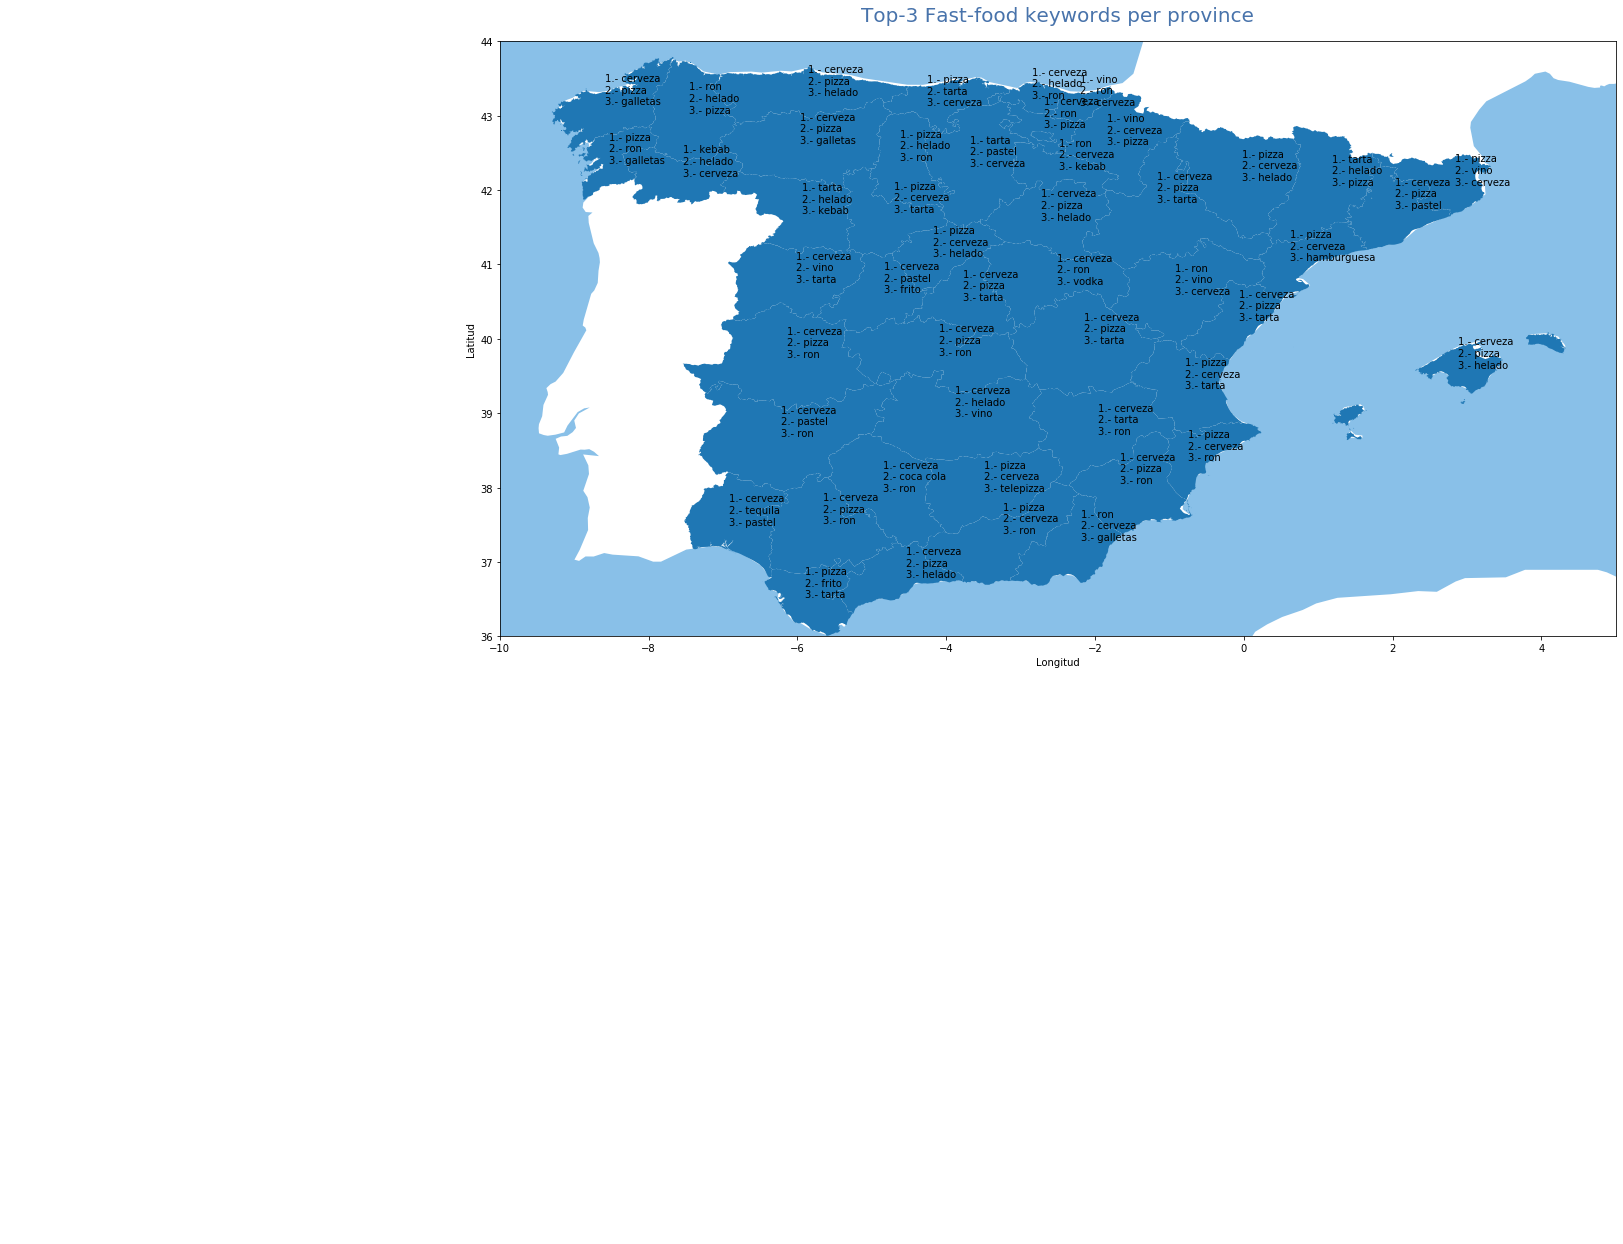

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

    
# Control del encuadre (área geográfica) del mapa
ax.axis([-10, 5, 36, 44])
 
# Control del título y los ejes
ax.set_title('Top-3 Fast-food keywords per province', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

map_data.plot(ax=ax)
for idx, row in map_data.iterrows():
    plt.annotate(s=row['maxFoodKeys'], xy=list(row['geometry'].representative_point().coords)[0],
                  color='black') 
 
# Cargar un mapa base con contornos de países
oceanos = "ne_50m_ocean.shx"
map_oceanos = gpd.read_file(drive_path + oceanos)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

### MADRID

There are 10500 words in the combination of all review.


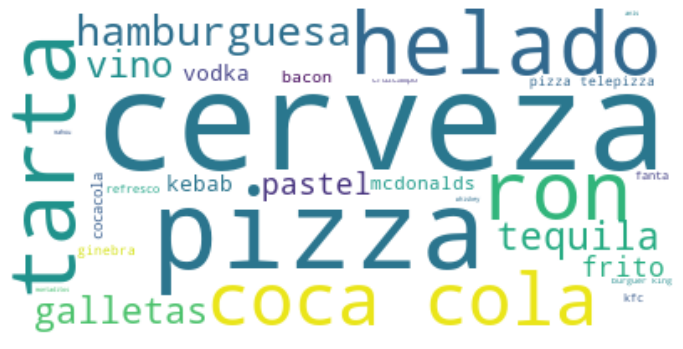

In [0]:
text = " ".join(food for food in map_data[map_data['NAME_2']=='Madrid'].FoodKeys.values[0])
print ("There are {} words in the combination of all review.".format(len(text)))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
keys = pd.Series(map_data[map_data['NAME_2']=='Madrid'].FoodKeys.values[0]).value_counts().index.values.tolist()
values = pd.Series(map_data[map_data['NAME_2']=='Madrid'].FoodKeys.values[0]).value_counts().values.tolist()

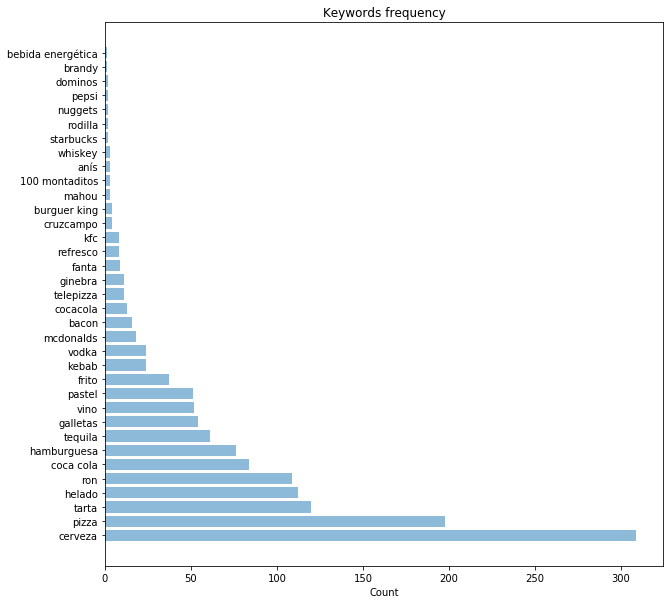

In [0]:
y_pos = np.arange(len(keys))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, keys)
plt.xlabel('Count')
plt.title('Keywords frequency')

plt.show()

### Sentiment and Emotion analysis

In [0]:
df.sentiment.value_counts()

Neutral     4033
Positive    1392
Negative     179
Name: sentiment, dtype: int64

In [0]:
sentimentDict = {}

for prov in map_data.NAME_2:
  sentimentDict[prov]= {
      'Neutral':0,
      'Positive':0,
      'Negative':0
  }


for idx, row in df.iterrows():
  for idx_map, row_map in map_data.iterrows():
    if row_map['geometry'].contains(row['Point_Coords']):
      sentimentDict[row_map['NAME_2']][row['sentiment']] += 1
    
sentimentDict 

{'A Coruña': {'Negative': 4, 'Neutral': 72, 'Positive': 23},
 'Albacete': {'Negative': 1, 'Neutral': 18, 'Positive': 6},
 'Alicante': {'Negative': 5, 'Neutral': 119, 'Positive': 23},
 'Almería': {'Negative': 0, 'Neutral': 27, 'Positive': 12},
 'Asturias': {'Negative': 5, 'Neutral': 76, 'Positive': 31},
 'Badajoz': {'Negative': 2, 'Neutral': 56, 'Positive': 12},
 'Baleares': {'Negative': 1, 'Neutral': 16, 'Positive': 3},
 'Barcelona': {'Negative': 15, 'Neutral': 375, 'Positive': 111},
 'Burgos': {'Negative': 1, 'Neutral': 27, 'Positive': 16},
 'Cantabria': {'Negative': 2, 'Neutral': 44, 'Positive': 25},
 'Castellón': {'Negative': 2, 'Neutral': 28, 'Positive': 10},
 'Ciudad Real': {'Negative': 0, 'Neutral': 15, 'Positive': 5},
 'Cuenca': {'Negative': 1, 'Neutral': 14, 'Positive': 2},
 'Cáceres': {'Negative': 2, 'Neutral': 11, 'Positive': 2},
 'Cádiz': {'Negative': 3, 'Neutral': 118, 'Positive': 46},
 'Córdoba': {'Negative': 2, 'Neutral': 24, 'Positive': 3},
 'Girona': {'Negative': 0, 'Ne

In [0]:
posSent = []
negSent = []
neuSent = []

for idx, row in map_data.iterrows():
  posSent.append(sentimentDict[row['NAME_2']]['Positive'])
  negSent.append(sentimentDict[row['NAME_2']]['Negative'])
  neuSent.append(sentimentDict[row['NAME_2']]['Neutral'])

map_data['posSent'] = posSent
map_data['negSent'] = negSent
map_data['neuSent'] = neuSent

map_data[['NAME_2', 'posSent', 'negSent', 'neuSent']]

,NAME_2,posSent,negSent,neuSent
0,Almería,12,0,27
1,Cádiz,46,3,118
2,Córdoba,3,2,24
3,Granada,22,2,103
4,Huelva,2,0,12
5,Jaén,14,0,31
6,Málaga,77,15,247
7,Sevilla,92,14,315
8,Huesca,5,1,18
9,Teruel,2,0,0


In [0]:
map_data['posSentDensity'] = map_data.posSent/map_data.Fastfood_Tweets
map_data['negSentDensity'] = map_data.negSent/map_data.Fastfood_Tweets

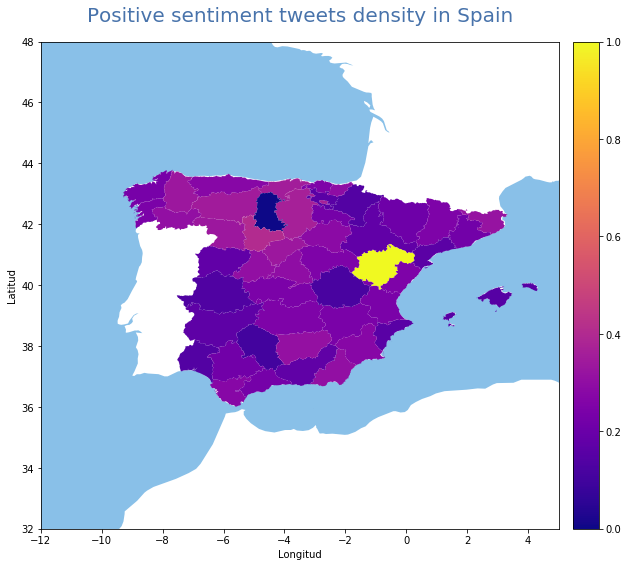

In [0]:
## Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-12, 5, 32, 48])
 
# Control del título y los ejes
ax.set_title('Positive sentiment tweets density in Spain', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
map_data.plot(column='posSentDensity', cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=5)
 
# Cargar un mapa base con contornos de países
oceanos = "ne_50m_ocean.shx"
map_oceanos = gpd.read_file(drive_path + oceanos)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

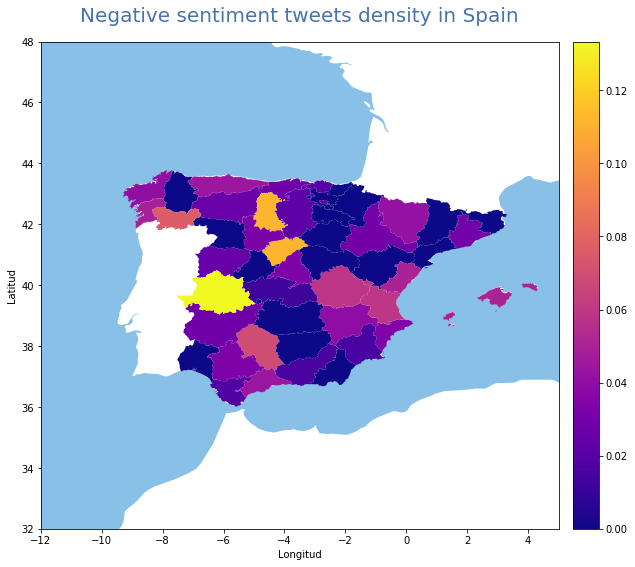

In [0]:
## Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-12, 5, 32, 48])
 
# Control del título y los ejes
ax.set_title('Negative sentiment tweets density in Spain', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
map_data.plot(column='negSentDensity', cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=5)
 
# Cargar un mapa base con contornos de países
oceanos = "ne_50m_ocean.shx"
map_oceanos = gpd.read_file(drive_path + oceanos)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

In [0]:
map_data[['NAME_2', 'posSentDensity', 'negSentDensity']]

,NAME_2,posSentDensity,negSentDensity
0,Almería,0.307692,0.000000
1,Cádiz,0.275449,0.017964
2,Córdoba,0.103448,0.068966
3,Granada,0.173228,0.015748
4,Huelva,0.142857,0.000000
5,Jaén,0.311111,0.000000
6,Málaga,0.227139,0.044248
7,Sevilla,0.218527,0.033254
8,Huesca,0.208333,0.041667
9,Teruel,1.000000,0.000000


In [0]:
df.emotion.value_counts()


awe              2062
amusement        1409
anger             786
annoyance         692
indifference      353
joy               147
negative-fear      65
sadness            54
ral                36
Name: emotion, dtype: int64

In [0]:
emotionDict = {}

for prov in map_data.NAME_2:
  emotionDict[prov]= {
      'awe':0,
      'amusement':0,
      'anger':0,
      'annoyance':0,
      'indifference':0,
      'joy':0,
      'negative-fear':0,
      'sadness':0,
      'ral':0
  }


for idx, row in df.iterrows():
  for idx_map, row_map in map_data.iterrows():
    if row_map['geometry'].contains(row['Point_Coords']):
      emotionDict[row_map['NAME_2']][row['emotion']] += 1
    
emotionDict 

{'A Coruña': {'amusement': 27,
  'anger': 19,
  'annoyance': 18,
  'awe': 27,
  'indifference': 2,
  'joy': 2,
  'negative-fear': 1,
  'ral': 0,
  'sadness': 3},
 'Albacete': {'amusement': 6,
  'anger': 0,
  'annoyance': 4,
  'awe': 12,
  'indifference': 2,
  'joy': 0,
  'negative-fear': 0,
  'ral': 0,
  'sadness': 1},
 'Alicante': {'amusement': 39,
  'anger': 25,
  'annoyance': 25,
  'awe': 48,
  'indifference': 5,
  'joy': 4,
  'negative-fear': 1,
  'ral': 0,
  'sadness': 0},
 'Almería': {'amusement': 5,
  'anger': 6,
  'annoyance': 6,
  'awe': 18,
  'indifference': 2,
  'joy': 1,
  'negative-fear': 0,
  'ral': 0,
  'sadness': 1},
 'Asturias': {'amusement': 33,
  'anger': 19,
  'annoyance': 11,
  'awe': 39,
  'indifference': 6,
  'joy': 2,
  'negative-fear': 1,
  'ral': 0,
  'sadness': 1},
 'Badajoz': {'amusement': 13,
  'anger': 9,
  'annoyance': 8,
  'awe': 33,
  'indifference': 4,
  'joy': 1,
  'negative-fear': 2,
  'ral': 0,
  'sadness': 0},
 'Baleares': {'amusement': 6,
  'anger

In [0]:
aweEmo = []
amusEmo = []
angerEmo = []
annoyEmo = []
indEmo = []
joyEmo=[]
negEmo=[]
sadEmo=[]
ralEmo=[]


for idx, row in map_data.iterrows():
  aweEmo.append(emotionDict[row['NAME_2']]['awe'])
  amusEmo.append(emotionDict[row['NAME_2']]['amusement'])
  angerEmo.append(emotionDict[row['NAME_2']]['anger'])
  annoyEmo.append(emotionDict[row['NAME_2']]['annoyance'])
  indEmo.append(emotionDict[row['NAME_2']]['indifference'])
  joyEmo.append(emotionDict[row['NAME_2']]['joy'])
  negEmo.append(emotionDict[row['NAME_2']]['negative-fear'])
  sadEmo.append(emotionDict[row['NAME_2']]['sadness'])
  ralEmo.append(emotionDict[row['NAME_2']]['ral'])
  

map_data['aweEmo'] = aweEmo
map_data['amusEmo'] = amusEmo 
map_data['angerEmo'] = angerEmo
map_data['annoyEmo'] = annoyEmo
map_data['indEmo'] = indEmo
map_data['joyEmo'] = joyEmo
map_data['negEmo'] = negEmo
map_data['sadEmo'] = sadEmo
map_data['ralEmo'] = ralEmo

map_data[['NAME_2', 'aweEmo', 'amusEmo', 'angerEmo',
          'annoyEmo', 'indEmo', 'joyEmo', 'negEmo', 'sadEmo','ralEmo']]

,NAME_2,aweEmo,amusEmo,angerEmo,annoyEmo,indEmo,joyEmo,negEmo,sadEmo,ralEmo
0,Almería,18,5,6,6,2,1,0,1,0
1,Cádiz,87,44,9,10,12,3,1,0,1
2,Córdoba,9,6,5,5,1,0,0,2,1
3,Granada,39,45,18,16,4,1,2,1,1
4,Huelva,2,3,3,4,1,0,0,1,0
5,Jaén,18,15,1,7,4,0,0,0,0
6,Málaga,119,83,60,41,18,10,3,2,3
7,Sevilla,164,110,61,44,20,9,3,6,4
8,Huesca,12,4,3,3,1,1,0,0,0
9,Teruel,0,0,2,0,0,0,0,0,0


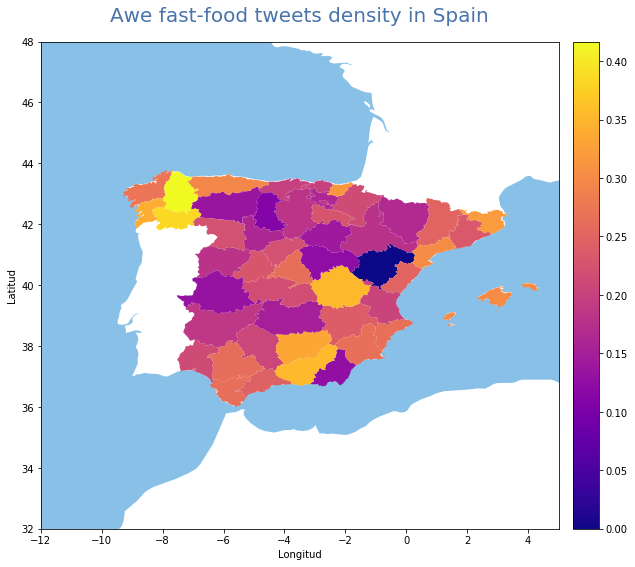

In [0]:
map_data['amusementDensity'] = map_data.amusEmo / map_data.Fastfood_Tweets

## Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-12, 5, 32, 48])
 
# Control del título y los ejes
ax.set_title('Awe fast-food tweets density in Spain', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
map_data.plot(column='amusementDensity', cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=5)
 
# Cargar un mapa base con contornos de países
oceanos = "ne_50m_ocean.shx"
map_oceanos = gpd.read_file(drive_path + oceanos)
map_oceanos.plot(ax=ax, color='#89c0e8', zorder=0)

### Image Object Detection

In [0]:
df[df.detections.notna()]

,coordinates,created_at,geo,id,id_str,lang,place,user,extended_tweet,extended_entities,user_location,Country,City,Longitude,Latitude,Coordinates,text2Proc,username,name,keywords,fastfood,sentiment,emotion,prediction,Length,detections,Point_Coords
9,NaN,2019-11-07 16:28:46.000,NaN,1.192479e+18,1.192479e+18,es,"{'id': '387b00909c2e7031', 'url': 'https://api...","{'id': 925983890, 'id_str': '925983890', 'name...",NaN,"{'media': [{'id': 1192478915090157569, 'id_str...",Almería - Granada - Al Andalus,Spain,Granada,-3.699796,37.135903,"(-3.699796, 37.135903)",@_lycaea mi cara cuando fuimos al sitio ese de...,capabot,The Shahmen 🥀,['cerveza'],1,Neutral,anger,"[""['drive/My Drive/Colab Notebooks/Images/Imag...",1.0,"[{'name': 'person', 'percentage_probability': ...",POINT (-3.699796 37.135903)
47,NaN,2019-11-07 18:28:10.000,NaN,1.192509e+18,1.192509e+18,es,"{'id': '2b53b3439c29b85b', 'url': 'https://api...","{'id': 884131815677734913, 'id_str': '88413181...",NaN,"{'media': [{'id': 1192509041462960130, 'id_str...",San Sebastián España,Spain,San Sebastián,-2.086689,43.217639,"(-2.086689, 43.217639)",No podría vivir mucho tiempo en un pais donde ...,JabierGS,Jabi de Moria 🍜🔪🛵🎨,['vino'],1,Neutral,annoyance,"[""['drive/My Drive/Colab Notebooks/Images/Imag...",1.0,"[{'name': 'person', 'percentage_probability': ...",POINT (-2.086689 43.217639)
75,NaN,2019-11-07 19:27:59.000,NaN,1.192524e+18,1.192524e+18,es,"{'id': '0e638ce7cf945000', 'url': 'https://api...","{'id': 75383346, 'id_str': '75383346', 'name':...",NaN,"{'media': [{'id': 1192524103581872129, 'id_str...",Madrid,Spain,Pan Frito,-6.970241,38.876915,"(-6.970241, 38.876915)","36. Cena en Pan Frito, Badajoz. Moderno y mejo...",Maman_durria,Mamandurrio,['frito'],1,Positive,awe,"[""['drive/My Drive/Colab Notebooks/Images/Imag...",1.0,"[{'name': 'dining table', 'percentage_probabil...",POINT (-6.970241 38.876915)
252,NaN,2019-11-08 14:07:18.000,NaN,1.192806e+18,1.192806e+18,es,"{'id': 'cd43ea85d651af92', 'url': 'https://api...","{'id': 144259868, 'id_str': '144259868', 'name...",NaN,"{'media': [{'id': 1192805781961396224, 'id_str...",Mollet del Valles,Spain,Bilbao,-2.986010,43.213654,"(-2.98601, 43.213654)",Qué bien sientan un par de copas de vino... y ...,nuriamp9,Núria MP 🍀,['vino'],1,Positive,awe,"[""['drive/My Drive/Colab Notebooks/Images/Imag...",1.0,"[{'name': 'tv', 'percentage_probability': 56.9...",POINT (-2.98601 43.213654)
349,NaN,2019-11-08 19:14:41.000,NaN,1.192883e+18,1.192883e+18,es,"{'id': 'cac6b24dc2c4232b', 'url': 'https://api...","{'id': 366844911, 'id_str': '366844911', 'name...",NaN,"{'media': [{'id': 1192883148394303489, 'id_str...",Andújar-Andalucia-la humanidad,Spain,Andújar,-4.278457,37.965058,"(-4.278457, 37.965058)",Y así cierro mi campaña electoral. Mañana día ...,emiliocruro,Emilio de la Cruz,['cerveza'],1,Neutral,anger,"[""['drive/My Drive/Colab Notebooks/Images/Imag...",1.0,[],POINT (-4.278457 37.965058)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8314,NaN,2019-12-15 11:06:33.000,NaN,1.206169e+18,1.206169e+18,es,"{'id': '1a27537478dd8e38', 'url': 'https://api...","{'id': 3258985623, 'id_str': '3258985623', 'na...",NaN,"{'media': [{'id': 1206168655018561536, 'id_str...",Aragua Venezuela,Spain,Barcelona,2.052477,41.317048,"(2.052477, 41.317048)",Cerveza. https://t.co/MtjkEpAaBw,Gabrieelavgr,Gabriela Gómez ☾,['cerveza'],1,Neutral,anger,"[""['drive/My Drive/Colab Notebooks/Images/Imag...",1.0,[],POINT (2.052477 41.317048)
8337,NaN,2019-12-15 12:22:07.000,NaN,1.206188e+18,1.206188e+18,es,"{'id': '5e998eaa02492b79', 'url': 'https://api...","{'id': 512367229, 'id_str': '512367229', 'name...",NaN,"{'media': [{'id': 1206187671900622848, 'id_str...",La senda que elegí,Spain,Roquetas de Mar,-2.664889,36.698108,"(-2.664889, 36.698108)",Beberte una cerveza con el codo partido \n@Eli...,MariaDiaz013,María♣,['cerveza'],1,Neutral,annoyance,"[""['drive/My Drive/Colab Notebooks/Images/Imag...",1.0,"[{'name': 'ce

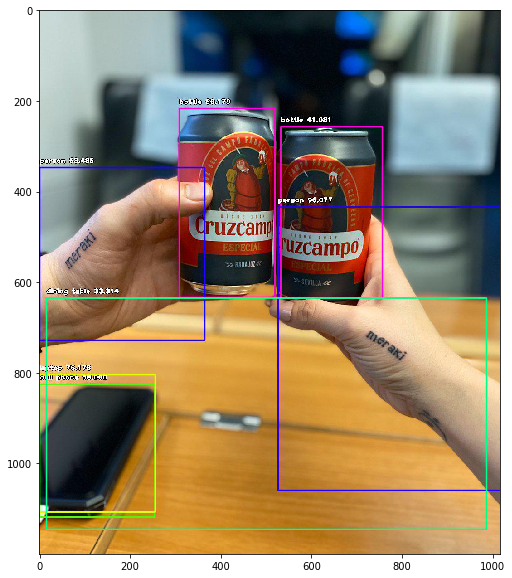

In [0]:
import matplotlib.image as mpimg

img=mpimg.imread(drive_path + 'Images/ProcessedImages/image0.jpg')
plt.figure(figsize=(10,10))
imgplot = plt.imshow(img)
plt.show()

In [0]:
ast.literal_eval(df[df.detections.notna()].detections[9])

[{'box_points': [230, 442, 332, 560],
  'name': 'person',
  'percentage_probability': 31.464016437530518},
 {'box_points': [8, 125, 714, 1141],
  'name': 'person',
  'percentage_probability': 91.98562502861023}]

In [0]:
detectionsDict = {}
df_detNotNA = df[df.detections.notna()]

for prov in map_data.NAME_2:
  detectionsDict[prov]= {
      'objects': [],
      'probabilities': []
  }


for idx, row in df_detNotNA.iterrows():
  for idx_map, row_map in map_data.iterrows():
    if row_map['geometry'].contains(row['Point_Coords']):
      for detection in ast.literal_eval(row['detections']):
        if detection['percentage_probability'] > 50.0:
          detectionsDict[row_map['NAME_2']]['objects'].append(detection['name'])
          detectionsDict[row_map['NAME_2']]['probabilities'].append(detection['percentage_probability'])

    
detectionsDict 

{'A Coruña': {'objects': ['person',
   'person',
   'car',
   'book',
   'person',
   'pizza',
   'person'],
  'probabilities': [99.51239824295044,
   91.90683364868164,
   84.61511135101318,
   58.50374698638916,
   78.99773120880127,
   94.30851936340332,
   99.94831681251526]},
 'Albacete': {'objects': ['kite'], 'probabilities': [51.928579807281494]},
 'Alicante': {'objects': ['bottle',
   'fork',
   'person',
   'person',
   'person',
   'person',
   'wine glass',
   'bottle',
   'wine glass',
   'wine glass',
   'bottle',
   'wine glass',
   'dining table',
   'dining table',
   'cell phone',
   'person',
   'bottle',
   'person',
   'person',
   'person',
   'person',
   'bottle',
   'dining table',
   'dining table',
   'person',
   'person',
   'cat',
   'person',
   'pizza',
   'person',
   'pizza',
   'sandwich',
   'dining table',
   'cake',
   'dining table',
   'cake'],
  'probabilities': [81.2706470489502,
   70.86036205291748,
   83.9465856552124,
   65.35409092903137,
 

In [0]:
objDet = []
probabDet = []

for idx, row in map_data.iterrows():
  objDet.append(detectionsDict[row['NAME_2']]['objects'])
  probabDet.append(detectionsDict[row['NAME_2']]['probabilities'])

map_data['objDet'] = objDet
map_data['probabDet'] = probabDet

map_data[['NAME_2', 'objDet', 'probabDet']]

,NAME_2,objDet,probabDet
0,Almería,"[person, person, person]","[86.51819229125977, 56.6001296043396, 96.27007..."
1,Cádiz,"[spoon, spoon, dining table, person, person, c...","[56.675660610198975, 70.60006260871887, 52.268..."
2,Córdoba,[],[]
3,Granada,"[person, wine glass, wine glass, dining table,...","[91.98562502861023, 88.67017030715942, 88.2387..."
4,Huelva,[],[]
5,Jaén,[],[]
6,Málaga,"[clock, clock, clock, person, truck, truck, ce...","[51.79646015167236, 66.3002610206604, 61.44189..."
7,Sevilla,"[pizza, chair, bicycle, bicycle, bicycle, chai...","[96.4773952960968, 50.0914990901947, 79.128134..."
8,Huesca,"[car, chair, vase]","[52.47985124588013, 50.475895404815674, 71.654..."
9,Teruel,[],[]


In [0]:
objectsDict = {}
for items in map_data.objDet:
  for item in items:
    if item in objectsDict:
      objectsDict[item] += 1
    else:
      objectsDict[item] = 1

objectsDict = sorted(objectsDict.items(), key = 
             lambda kv:(kv[1], kv[0]))
objectsDict

[('bed', 1),
 ('bench', 1),
 ('broccoli', 1),
 ('couch', 1),
 ('frisbee', 1),
 ('horse', 1),
 ('keyboard', 1),
 ('kite', 1),
 ('laptop', 1),
 ('motorcycle', 1),
 ('mouse', 1),
 ('orange', 1),
 ('parking meter', 1),
 ('skateboard', 1),
 ('sports ball', 1),
 ('stop sign', 1),
 ('teddy bear', 1),
 ('cat', 2),
 ('microwave', 2),
 ('oven', 2),
 ('potted plant', 2),
 ('tie', 2),
 ('tv', 2),
 ('donut', 3),
 ('hot dog', 3),
 ('truck', 3),
 ('umbrella', 3),
 ('car', 4),
 ('clock', 4),
 ('dog', 5),
 ('spoon', 5),
 ('vase', 5),
 ('cell phone', 6),
 ('knife', 6),
 ('bicycle', 7),
 ('book', 8),
 ('fork', 8),
 ('chair', 9),
 ('bowl', 10),
 ('wine glass', 14),
 ('cake', 22),
 ('sandwich', 22),
 ('pizza', 34),
 ('cup', 37),
 ('dining table', 44),
 ('bottle', 62),
 ('person', 158)]

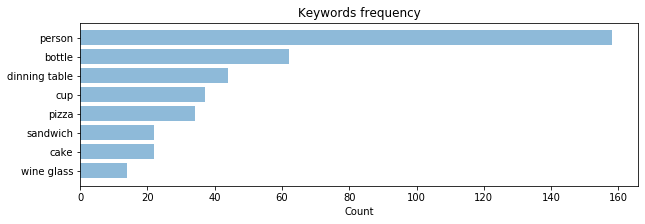

In [0]:
keys, values = zip(*objectsDict)
keys = ('wine glass', 'cake', 'sandwich', 'pizza', 'cup', 'dinning table', 'bottle', 'person')
values = (14,22,22,34,37,44,62,158)
y_pos = np.arange(len(keys))
fig, ax = plt.subplots(1, 1, figsize=(10, 3))

plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, keys)
plt.xlabel('Count')
plt.title('Keywords frequency')

plt.show()

In [0]:
aux = []
for value in values:
  if value>20:
    aux.append(value)
aux

[22, 22, 34, 37, 44, 62, 158]

# Madrid

In [0]:
keys = pd.Series(map_data[map_data['NAME_2']=='Madrid'].objDet.values[0]).value_counts().index.values.tolist()
values = pd.Series(map_data[map_data['NAME_2']=='Madrid'].objDet.values[0]).value_counts().values.tolist()

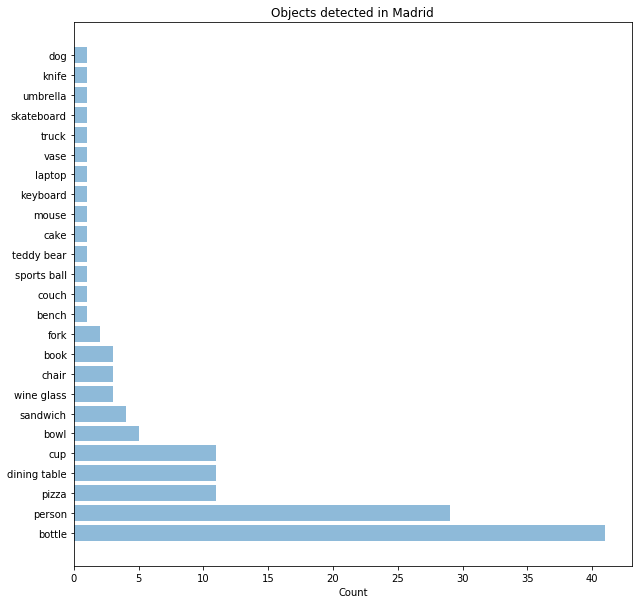

In [0]:
y_pos = np.arange(len(keys))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, keys)
plt.xlabel('Count')
plt.title('Objects detected in Madrid')

plt.show()

### Image classification

In [0]:
df[df.prediction.notna()].text2Proc[375]

'¡Pizza casera!\nCon el vino, creo que en casa intentan decirme algo 🤔 https://t.co/fGM1NYD8NQ'

In [0]:
url = ast.literal_eval(ast.literal_eval(df[df.prediction.notna()].prediction[47])[0])[0]
ast.literal_eval(ast.literal_eval(df[df.prediction.notna()].prediction[47])[0])

['drive/My Drive/Colab Notebooks/Images/Images/1.1925090602618266e+18/1192509041462960130.jpg',
 20.14,
 'chocolate_mousse']

In [0]:
df[df.prediction.notna()].prediction[9]

'["[\'drive/My Drive/Colab Notebooks/Images/Images/1.192479011081007e+18/1192478915090157569.jpg\', 30.93, \'cup_cakes\']"]'

In [0]:
predictions = []

for pred in df[df.prediction.notna()].prediction:
  probability = ast.literal_eval(ast.literal_eval(pred)[0])[1]
  if probability > 50.0:
    url = ast.literal_eval(ast.literal_eval(pred)[0])[0]
    food = ast.literal_eval(ast.literal_eval(pred)[0])[2]
    predictions.append([url, food, probability])

pizza
99.35


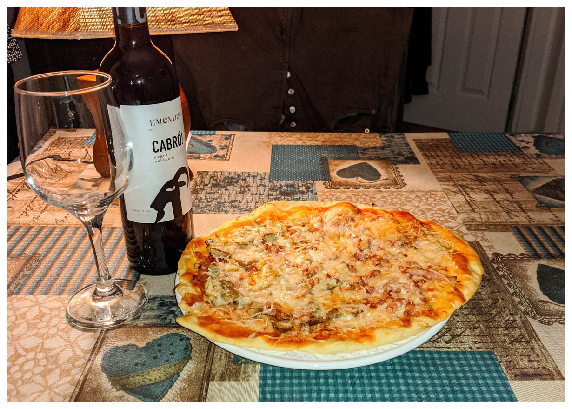

In [0]:
#1,7,8,12,13,15,32,39, 40,42
index = 1
print(predictions[index][1])
print(predictions[index][2])

img=mpimg.imread(predictions[index][0])
plt.figure(figsize=(10,10))
imgplot = plt.imshow(img)
plt.axis("off")
plt.show()